# Studio Tuesday: The fat cats of Brooklyn 

In [ ]:
#files from inspection: https://www.muckrock.com/foi/new-york-16/bodega-cat-complaints-29199/#file-110233
#page from: Consumer Complaints to the Food Safety and Inspection division made from Jan. 1, 2015, to Oct. 26, 2016, that contain the words "cat" or "cats."

In [ ]:
import pandas as pd
import geopandas as gpd
pd.set_option('max_columns', 50)
from shapely.geometry import Point
%matplotlib inline

In [55]:
df_all_cats = pd.read_csv('cats_geocodio.csv')
df_all_cats.head(2)

,ESTABNO,INSPDATE,DEFNO,DEFTEXT,OWNNAME,TRADENAME,STREET,CITY,ZIP,complete,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,City,State,County,Zip,Country
0,629392,2015-01-12,14C,<div>- A &nbsp;cat is noted in the deli area.<...,2082 MADISON FOOD CORP,2082 MADISON FOOD,2082 MADISON AVE,NEW YORK,10037,"2082 MADISON AVE, NEW YORK",40.809686,-73.937947,1.0,rooftop,2082,Madison Ave,New York,NY,New York County,10037,US
1,11025,2015-01-09,14C,<div>- A cat food container is noted in the re...,FAREH ABDULHALEEM,BOULEVARD GROCERY,139 HENRY JOHNSON BLVD,ALBANY,12210,"139 HENRY JOHNSON BLVD, ALBANY",42.659493,-73.763336,0.8,street_center,NaN,Henry Johnson Blvd,Albany,NY,Albany County,12210,US


In [57]:
df_all_cats.columns

Index(['ESTABNO', 'INSPDATE', 'DEFNO', 'DEFTEXT', 'OWNNAME', 'TRADENAME',
       'STREET', 'CITY', 'ZIP', 'complete', 'Latitude', 'Longitude',
       'Accuracy Score', 'Accuracy Type', 'Number', 'Street', 'City', 'State',
       'County', 'Zip', 'Country'],
      dtype='object')

In [59]:
df_all_cats['geometry'] = df_all_cats.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
df_all_cats.head(2)

,ESTABNO,INSPDATE,DEFNO,DEFTEXT,OWNNAME,TRADENAME,STREET,CITY,ZIP,complete,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,City,State,County,Zip,Country,geometry
0,629392,2015-01-12,14C,<div>- A &nbsp;cat is noted in the deli area.<...,2082 MADISON FOOD CORP,2082 MADISON FOOD,2082 MADISON AVE,NEW YORK,10037,"2082 MADISON AVE, NEW YORK",40.809686,-73.937947,1.0,rooftop,2082,Madison Ave,New York,NY,New York County,10037,US,POINT (-73.93794699999999 40.809686)
1,11025,2015-01-09,14C,<div>- A cat food container is noted in the re...,FAREH ABDULHALEEM,BOULEVARD GROCERY,139 HENRY JOHNSON BLVD,ALBANY,12210,"139 HENRY JOHNSON BLVD, ALBANY",42.659493,-73.763336,0.8,street_center,NaN,Henry Johnson Blvd,Albany,NY,Albany County,12210,US,POINT (-73.763336 42.659493)


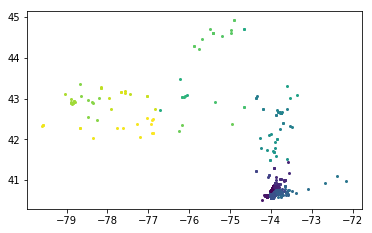

In [60]:
df_all_cats.plot(column='ZIP')

In [61]:
geometry = df_all_cats[['INSPDATE', 'DEFTEXT', 'TRADENAME', 'STREET', 'CITY', 'ZIP', 'geometry']]
geometry.head(2)

,INSPDATE,DEFTEXT,TRADENAME,STREET,CITY,ZIP,geometry
0,2015-01-12,<div>- A &nbsp;cat is noted in the deli area.<...,2082 MADISON FOOD,2082 MADISON AVE,NEW YORK,10037,POINT (-73.93794699999999 40.809686)
1,2015-01-09,<div>- A cat food container is noted in the re...,BOULEVARD GROCERY,139 HENRY JOHNSON BLVD,ALBANY,12210,POINT (-73.763336 42.659493)


In [30]:
geometry.to_file('Cats_in_NYC.json', driver='GeoJSON')

In [42]:
type(geometry)

geopandas.geodataframe.GeoDataFrame

In [64]:
df_cats = pd.read_csv('cats_NYC.csv')

In [65]:
df_cats['CITY'].value_counts().head()

BROOKLYN     1580
BRONX         956
NEW YORK      438
JAMAICA        74
RIDGEWOOD      49
Name: CITY, dtype: int64

In [66]:
df_cats['DEFTEXT'].str.contains('basement').value_counts()

False    2618
True     1070
Name: DEFTEXT, dtype: int64

In [67]:
df_cats['DEFTEXT'].str.contains('dog').value_counts()

False    3544
True      144
Name: DEFTEXT, dtype: int64

In [68]:
df_cats['DEFTEXT'].str.contains('rat').value_counts()

False    3615
True       73
Name: DEFTEXT, dtype: int64

In [69]:
df_cats['TRADENAME'].value_counts().head(10)

LA PERA BROS LIVE PLTRY    11
44TH HALAL LIVE POULTRY    10
WATKINS HALAL               9
EL BADIA LIVE POULTRY       8
GRAHAM LIVE POULTRY         8
J&R LIVE POULTRY            7
NUCCIOS ITALIAN BAKERY      7
GRAND DELI                  7
ASSOCIATED                  7
C TOWN SUPERMARKET          7
Name: TRADENAME, dtype: int64

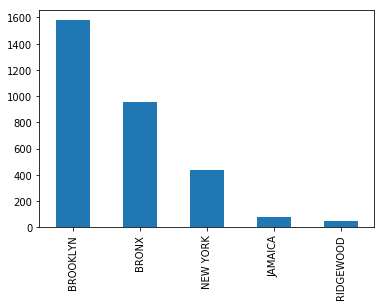

In [70]:
df_cats['CITY'].value_counts().head().plot(kind='bar')

In [71]:
df_cats['TRADENAME'].str.contains('DELI').value_counts()

False    2427
True     1253
Name: TRADENAME, dtype: int64

In [72]:
df_cats['TRADENAME'].str.contains('POULTRY').value_counts()#.#head()

False    3612
True       68
Name: TRADENAME, dtype: int64

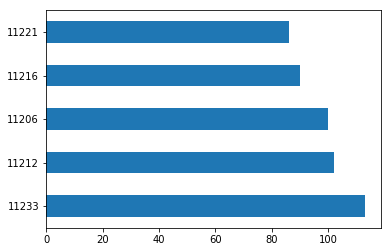

In [73]:
df_cats[df_cats['CITY'] == 'BROOKLYN']['ZIP'].value_counts().head().plot(kind='barh')